information :- in this project I have used "WE" rather than "I" in comments because it helps better to uderstand.

# PROJECT :
## Employee Performance Analysis
#### Code: 10281


## Client Info and Requirement :
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5
years.Recent years, the employee performance indexes are not healthy and this is becoming a growing
concerns among the top management. There has been increased escalations on service delivery and
client satisfaction levels came down by 8 percentage points.CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing employees as this would affect the employee morale of all the employees in general and may further
reduce the performance.Mr. Brain decided to initiate a data science project , which analyses the current employee data and find
the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects
the findings of this project will help him to take right course of actions. He also expects a clear indicators
of non performing employees, so that any penalization of non-performing employee, if required, may
not significantly affect other employee morals.


## Insights :
1. we need to find out department wise perfomance it will help in modelling and feature selection
2. we need to find out Top 3 Important Factors effecting employee performance by using corrillation (its a Client Requirement)
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis(Client Requirement)

# 1.Import Necessary Packages


In [1]:
import pandas as pd
import numpy as np
import pylab
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import colormaps
from scipy import stats
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle as pkl

# 2. Import DataSet

In [2]:
data = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

# 3. Exploratory Data Analysis

-> Checking weather the data is imported correctly or not

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


-> Checking the shape of the data

In [4]:
data.shape

(1200, 28)

-> Checking is there any Nan value present in the data_set 

In [5]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

From above information it's clear that there is No NaN value present in the data set

### Encoding the Features

We need to encode those features which has object type values for checking which are those features we use select_dtype function

In [6]:
data.select_dtypes(exclude="number").head()

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No


In [7]:
print(data.select_dtypes(exclude="number").columns)

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')


These are the list of features,That we need to Encode(here we avoid EmpNumber because its an id and unique for everyone,not a categorical feature)

***-> Considering the Gender(encoding)***

We know that Gender is a nominal data so we can go with One Hot Encoding technique

In [8]:
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [9]:
data["Gender"] = pd.get_dummies(data.Gender,drop_first=True)

In [10]:
data.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,1,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4


The Encoding Done Perfectly.

***-> Considering the OverTime(encoding)***

In [11]:
data.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

there is only two category in this feature, this is a norminal data hence we can go with One Hot Encoding

In [12]:
data["OverTime"] = pd.get_dummies(data.OverTime,drop_first=True)

In [13]:
data.OverTime.head()

0    0
1    0
2    1
3    0
4    0
Name: OverTime, dtype: uint8

Hence from the above head value its clear that encoding done correctly

***-> Considering the Attrition(encoding)***

In [14]:
data.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

there is only two category in this feature, so most probabily this is a norminal data hence we can go with One Hot Encoding

In [15]:
data["Attrition"]  = pd.get_dummies(data.Attrition,drop_first=True)

In [16]:
data.Attrition.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: uint8

Hence from the above head value its clear that encoding done correctly

***-> Considering the MaritalStatus(encoding)***

In [17]:
data.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

We know that This is a nominal data hence we can go with one hot encoding

In [18]:
Marage_status = pd.get_dummies(data.MaritalStatus,drop_first=True)

-> We get the encoded value in Marage_status variable now we need to drop the feature from the dataset and the same time we need to append the             Marage_status varaible to the data set

In [19]:
data.drop(columns=["MaritalStatus"],inplace=True)

In [20]:
data = pd.concat([data,Marage_status],axis=1)
data.head()

,EmpNumber,Age,Gender,EducationBackground,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Married,Single
0,E1001000,32,1,Marketing,Sales,Sales Executive,Travel_Rarely,10,3,4,...,2,2,10,7,0,8,0,3,0,1
1,E1001006,47,1,Marketing,Sales,Sales Executive,Travel_Rarely,14,4,4,...,2,3,7,7,1,7,0,3,0,1
2,E1001007,40,1,Life Sciences,Sales,Sales Executive,Travel_Frequently,5,4,4,...,2,3,18,13,1,12,0,4,1,0
3,E1001009,41,1,Human Resources,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,2,21,6,12,6,0,3,0,0
4,E1001010,60,1,Marketing,Sales,Sales Executive,Travel_Rarely,16,4,1,...,1,3,2,2,2,2,0,3,0,1


***-> Considering the BusinessTravelFrequency(encoding)***

In [21]:
data.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

This is a Nominal data hence we can go with One_Hot_Encoding

In [22]:
BusinessTravelFrequency = pd.get_dummies(data.BusinessTravelFrequency,drop_first=True)

-> We get the encoded value in BusinessTravelFrequency variable now we need to drop the feature from the dataset and the same time we need to append the BusinessTravelFrequency varaible to the data set.

In [23]:
data.drop(columns=["BusinessTravelFrequency"],inplace=True)

In [24]:
data = pd.concat([data,BusinessTravelFrequency],axis=1)
data.head()

,EmpNumber,Age,Gender,EducationBackground,EmpDepartment,EmpJobRole,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,...,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Married,Single,Travel_Frequently,Travel_Rarely
0,E1001000,32,1,Marketing,Sales,Sales Executive,10,3,4,55,...,10,7,0,8,0,3,0,1,0,1
1,E1001006,47,1,Marketing,Sales,Sales Executive,14,4,4,42,...,7,7,1,7,0,3,0,1,0,1
2,E1001007,40,1,Life Sciences,Sales,Sales Executive,5,4,4,48,...,18,13,1,12,0,4,1,0,1,0
3,E1001009,41,1,Human Resources,Human Resources,Manager,10,4,2,73,...,21,6,12,6,0,3,0,0,0,1
4,E1001010,60,1,Marketing,Sales,Sales Executive,16,4,1,84,...,2,2,2,2,0,3,0,1,0,1


***-> Considering the EducationBackground(encoding)***

In [25]:
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

while considering Education Background all categories are equall priority so we need to take this as nominal data hence we can go with One_Hot_Encoding

In [26]:
Education_Background =pd.get_dummies(data.EducationBackground,drop_first=True)

-> We get the encoded value in EducationBackground variable now we need to drop the feature from the dataset and the same time we need to append the Education_Background varaible to the data set.

In [27]:
data.drop(columns=["EducationBackground"],inplace=True)

In [28]:
data = pd.concat([data,Education_Background],axis=1)
data.head()

,EmpNumber,Age,Gender,EmpDepartment,EmpJobRole,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,PerformanceRating,Married,Single,Travel_Frequently,Travel_Rarely,Life Sciences,Marketing,Medical,Other,Technical Degree
0,E1001000,32,1,Sales,Sales Executive,10,3,4,55,3,...,3,0,1,0,1,0,1,0,0,0
1,E1001006,47,1,Sales,Sales Executive,14,4,4,42,3,...,3,0,1,0,1,0,1,0,0,0
2,E1001007,40,1,Sales,Sales Executive,5,4,4,48,2,...,4,1,0,1,0,1,0,0,0,0
3,E1001009,41,1,Human Resources,Manager,10,4,2,73,2,...,3,0,0,0,1,0,0,0,0,0
4,E1001010,60,1,Sales,Sales Executive,16,4,1,84,3,...,3,0,1,0,1,0,1,0,0,0


***-> Considering the EmpDepartment(encoding)***

While considering EmpDepartment we take it as nominal feature but in our client_requirement it is given than we need to consider Department wise performances so while encoding also we are considering departmnent wise perfomances

In [29]:
Department_Perfomance = data.groupby(["EmpDepartment"])["PerformanceRating"].mean()
Department_Perfomance.sort_values(ascending=False)

EmpDepartment
Development               3.085873
Data Science              3.050000
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Finance                   2.775510
Name: PerformanceRating, dtype: float64

The above details shows the department wise perfomances. so, we are gona map this details and using that we encode the feature and there are 6 categories we are gona give 1 to 6 values and the heighest value given to heighest perfoming department and lowest value given to low perfoming department

In [30]:
map_val = {    
            "Development"           :    6,
            "Data Science"          :    5,
            "Human Resources"       :    4,
            "Research & Development":    3,
            "Sales"                 :    2,
            "Finance"               :    1
          }

Now it is clear that the feature is ordinal and we have created  the map according to the catogories for the feature hence we can deploy the encoding

In [31]:
data["EmpDepartment"] = data.EmpDepartment.map(map_val)
data.head()

,EmpNumber,Age,Gender,EmpDepartment,EmpJobRole,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,PerformanceRating,Married,Single,Travel_Frequently,Travel_Rarely,Life Sciences,Marketing,Medical,Other,Technical Degree
0,E1001000,32,1,2,Sales Executive,10,3,4,55,3,...,3,0,1,0,1,0,1,0,0,0
1,E1001006,47,1,2,Sales Executive,14,4,4,42,3,...,3,0,1,0,1,0,1,0,0,0
2,E1001007,40,1,2,Sales Executive,5,4,4,48,2,...,4,1,0,1,0,1,0,0,0,0
3,E1001009,41,1,4,Manager,10,4,2,73,2,...,3,0,0,0,1,0,0,0,0,0
4,E1001010,60,1,2,Sales Executive,16,4,1,84,3,...,3,0,1,0,1,0,1,0,0,0


Hence encoding for "EmpDepartment" has done sucessfully

***-> Considering the EmpJobRole(encoding)***

We know that the feature is an ordinal data and the client didn't give any requests so we can continue with our findings. here I am using  target guided encoding ( we cannot use label encoding because if we use label encoder it will give priority randomly but target guided encoding gives priority with respect to target feature thats why I proceed with TGE ) 

In [32]:
EmpJobRole_mean = data.groupby(["EmpJobRole"])["PerformanceRating"].mean().sort_values().index
map_values = { i:x for x,i in enumerate(EmpJobRole_mean)}
map_values

{'Finance Manager': 0,
 'Senior Manager R&D': 1,
 'Healthcare Representative': 2,
 'Sales Executive': 3,
 'Laboratory Technician': 4,
 'Sales Representative': 5,
 'Research Director': 6,
 'Human Resources': 7,
 'Manager R&D': 8,
 'Manager': 9,
 'Research Scientist': 10,
 'Manufacturing Director': 11,
 'Delivery Manager': 12,
 'Technical Architect': 13,
 'Senior Developer': 14,
 'Data Scientist': 15,
 'Technical Lead': 16,
 'Developer': 17,
 'Business Analyst': 18}

While considering the average with respect to target variable we get the above maping values, now we can directly map those values to the categories inside the feature 

In [33]:
data["EmpJobRole"] = data.EmpJobRole.map(map_values)
data.head()

,EmpNumber,Age,Gender,EmpDepartment,EmpJobRole,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,PerformanceRating,Married,Single,Travel_Frequently,Travel_Rarely,Life Sciences,Marketing,Medical,Other,Technical Degree
0,E1001000,32,1,2,3,10,3,4,55,3,...,3,0,1,0,1,0,1,0,0,0
1,E1001006,47,1,2,3,14,4,4,42,3,...,3,0,1,0,1,0,1,0,0,0
2,E1001007,40,1,2,3,5,4,4,48,2,...,4,1,0,1,0,1,0,0,0,0
3,E1001009,41,1,4,9,10,4,2,73,2,...,3,0,0,0,1,0,0,0,0,0
4,E1001010,60,1,2,3,16,4,1,84,3,...,3,0,1,0,1,0,1,0,0,0


from the above dataset its clear that Encoding has been done perfectly for the feature "EmpJobRole"

#### ->Checking all the Encoding done Perfectly or Not

In [34]:
print(data.select_dtypes(exclude="number").columns)

Index(['EmpNumber'], dtype='object')


so only left is "EmpNumber" hence we get a conclussion that all of the features are encoded perfectly now we can move to next step

In [35]:
perfomanceRating = data["PerformanceRating"]
data.drop(columns="PerformanceRating",inplace=True)
data = pd.concat([data,perfomanceRating],axis=1)

# 4. Feature Reduction

By using this technique we remove the features which are not important/required for modelling

### 1.Dropping features with no impact in target

In [36]:
data.head()

,EmpNumber,Age,Gender,EmpDepartment,EmpJobRole,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,Married,Single,Travel_Frequently,Travel_Rarely,Life Sciences,Marketing,Medical,Other,Technical Degree,PerformanceRating
0,E1001000,32,1,2,3,10,3,4,55,3,...,0,1,0,1,0,1,0,0,0,3
1,E1001006,47,1,2,3,14,4,4,42,3,...,0,1,0,1,0,1,0,0,0,3
2,E1001007,40,1,2,3,5,4,4,48,2,...,1,0,1,0,1,0,0,0,0,4
3,E1001009,41,1,4,9,10,4,2,73,2,...,0,0,0,1,0,0,0,0,0,3
4,E1001010,60,1,2,3,16,4,1,84,3,...,0,1,0,1,0,1,0,0,0,3


In [37]:
len(data.EmpNumber.unique())

1200

Here the "EmpNumber" is an id hence it is different for every data points so we can drop the feature directly. There is no use with this feature in our modelling

In [38]:
data.drop(columns=["EmpNumber"],inplace=True)

### 2.Finding Threshold (Variance Threshold)

This method is used to remove those value's which are having a very low threshold between the values present in the same feature. here considering the threshold value as 0.1

In [39]:
varience = VarianceThreshold(0.1)
varience.fit(data)
varience.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True])

In [40]:
drop_column = data.columns[varience.get_support()==False]
drop_column

Index(['Other', 'Technical Degree'], dtype='object')

hence the above listed columns can be dropped


In [41]:
data.drop(columns=drop_column,inplace=True)

### 3.Finding correlation to drop features with highly corrilated to each other(Independent features)

here we are considering 0.8 as our cutoff and if any features exeeds the cutoff then we can say that they are duplicates of other features so we can remove those duplicates from our data

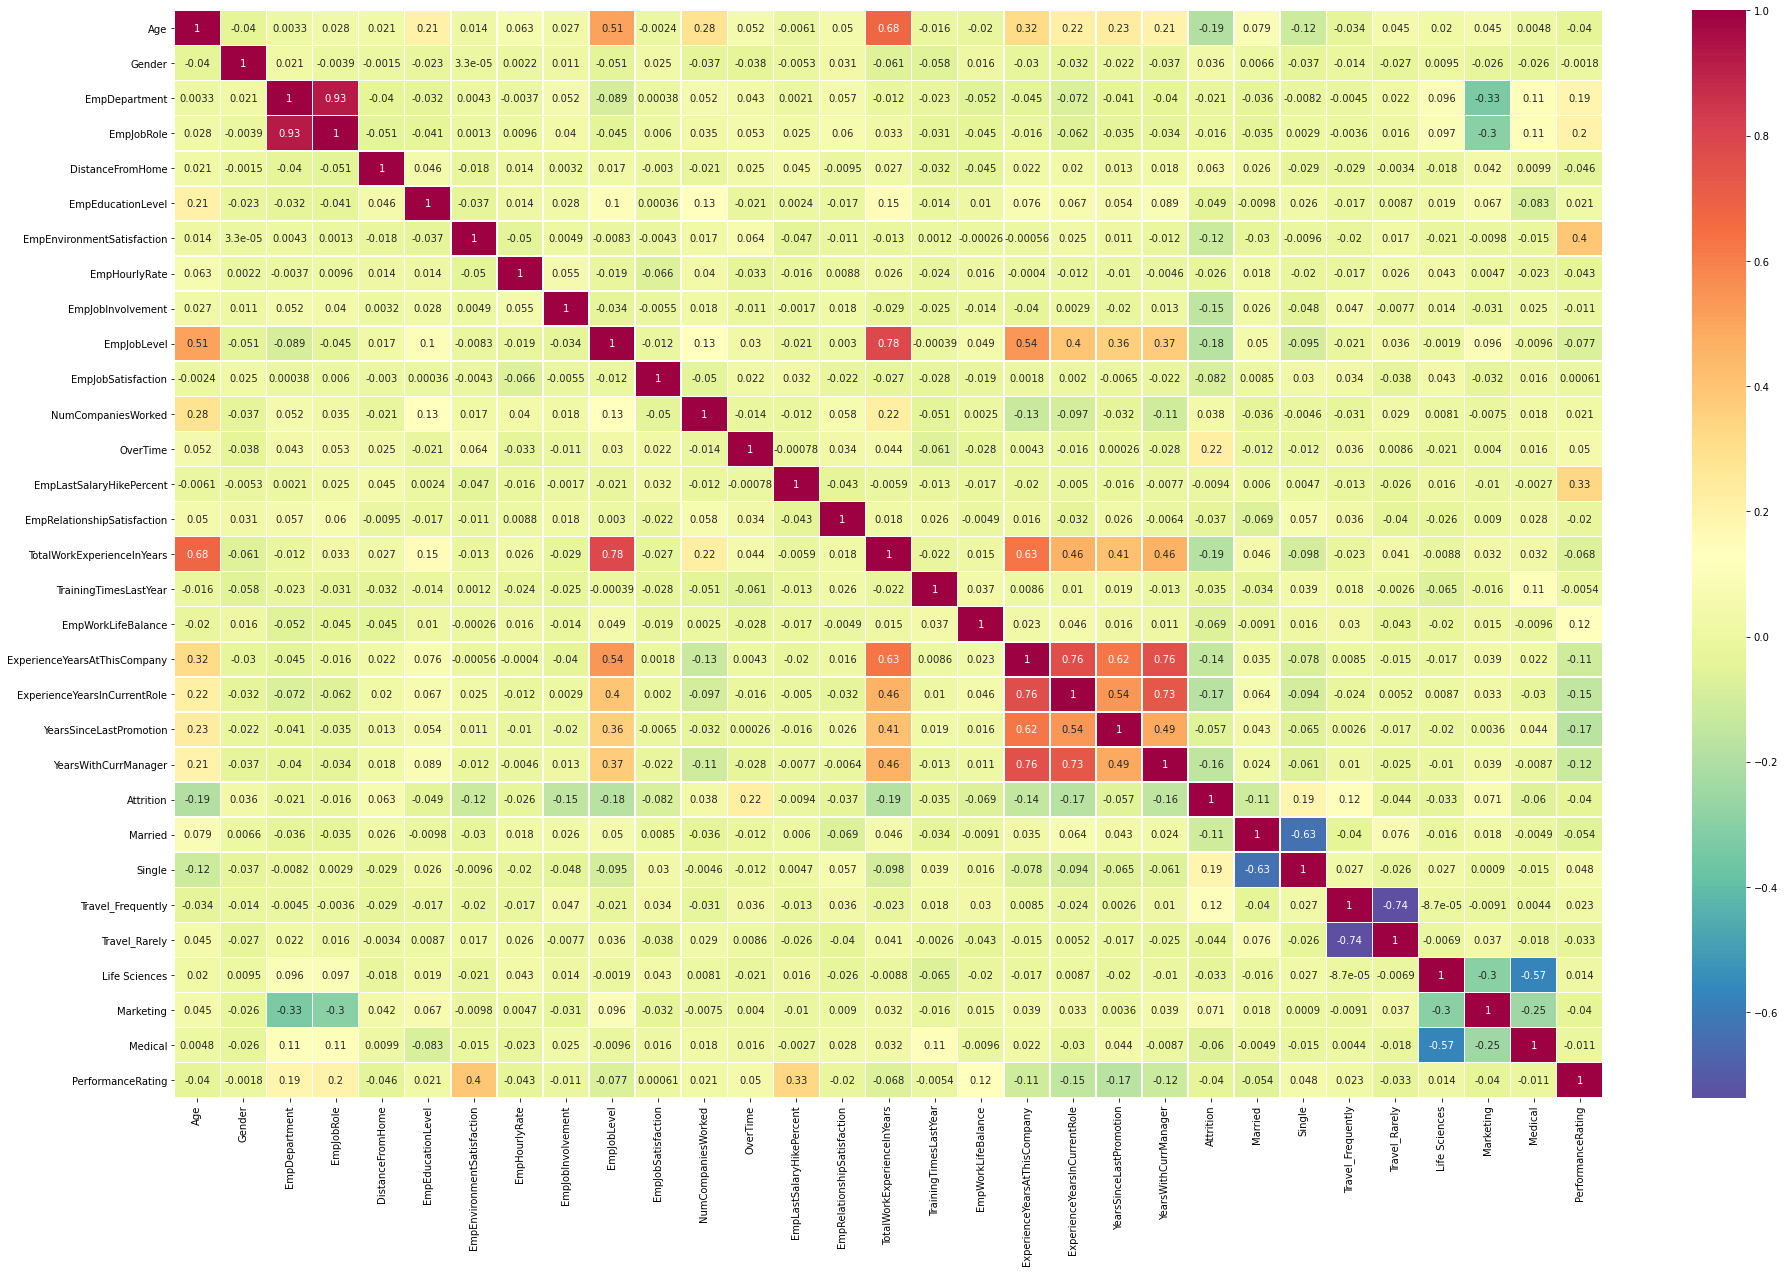

In [42]:
plt.rcParams["figure.figsize"] = 32,20
plt.rcParams["figure.facecolor"] = "white"
depend_corr = data.corr()
sb.heatmap(depend_corr,annot=True,linewidths=.5,cmap="Spectral_r")
plt.show()

from the above heatmap we can see the features which are highly correlated to each other, so we writing a program to drop those features from the data set

In [43]:
drop_cor =set()
for i in range(len(depend_corr)):
    for j in range(i):
        if abs(depend_corr.iloc[i,j]) > 0.8:
            column = depend_corr.columns[i]
            drop_cor.add(column)

In [44]:
drop_cor

{'EmpJobRole'}

In [45]:
data.drop(columns=drop_cor,inplace=True)

In [46]:
ind_corr = data.corr()

In [47]:
data.head()

,Age,Gender,EmpDepartment,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,YearsWithCurrManager,Attrition,Married,Single,Travel_Frequently,Travel_Rarely,Life Sciences,Marketing,Medical,PerformanceRating
0,32,1,2,10,3,4,55,3,2,4,...,8,0,0,1,0,1,0,1,0,3
1,47,1,2,14,4,4,42,3,2,1,...,7,0,0,1,0,1,0,1,0,3
2,40,1,2,5,4,4,48,2,3,1,...,12,0,1,0,1,0,1,0,0,4
3,41,1,4,10,4,2,73,2,5,4,...,6,0,0,0,0,1,0,0,0,3
4,60,1,2,16,4,1,84,3,2,1,...,2,0,0,1,0,1,0,1,0,3


### 4.Finding correlation to drop features who have low corrilation with Target (Dependent features)

here we are considering 0.1 as our cutoff and if any features below the cutoff then we can say that they are having a low corrilation with the Target feature. so we can remove those duplicates from our data

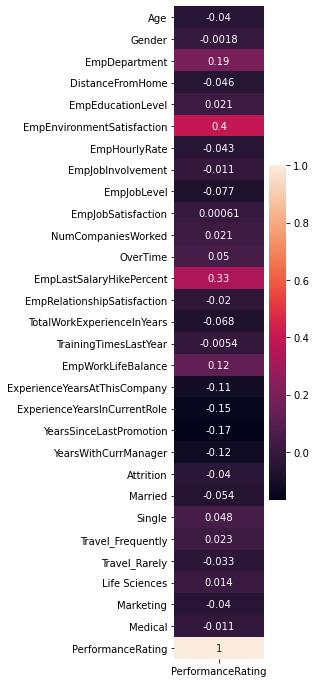

In [48]:
plt.rcParams["figure.figsize"] = 2,12 
sb.heatmap(ind_corr.iloc[:,-1:],annot=True)

In [49]:
drop_col =set()
for i in enumerate(ind_corr["PerformanceRating"]):
    if abs(i[1]) < 0.1:
        column = ind_corr.columns[i[0]]
        drop_col.add(column)
        

In [50]:
drop_col

{'Age',
 'Attrition',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'EmpRelationshipSatisfaction',
 'Gender',
 'Life Sciences',
 'Marketing',
 'Married',
 'Medical',
 'NumCompaniesWorked',
 'OverTime',
 'Single',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'Travel_Frequently',
 'Travel_Rarely'}

the above mensioned features are below the cutoff value(-0.1 to +0.1) hence we need to drop these featues using drop function


In [51]:
data.drop(columns=drop_col,inplace =True)

In [52]:
data.shape

(1200, 9)

In [53]:
data.head()

,EmpDepartment,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,2,4,12,2,10,7,0,8,3
1,2,4,12,3,7,7,1,7,3
2,2,4,21,3,18,13,1,12,4
3,4,2,15,2,21,6,12,6,3
4,2,1,14,3,2,2,2,2,3


# 5. Data Normalization

To find weather the given data points lies under the gausiion distribution . If not we need to make make it as a guassian distribution


### 1.Normality_check

In [54]:
plt.rcParams["figure.figsize"] = 10,5


def plotfigure(data,feature):
    print("\n\nskewness of the ",feature," is : ",stats.skew(data[feature]))
    print("kurtosis of the ",feature," is : ",stats.kurtosis(data[feature]))
    plt.subplot(1,2,1)
    sb.distplot(data[feature],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()
    
    
def line():
    print("\033[1m" + "_________________________________________________________________________________________________________"+ "\033[0m")


the above mensioned function will creates probability plot(QQ_plot) and histogram(dist_plot)


                             E̲m̲p̲D̲e̲p̲a̲r̲t̲m̲e̲n̲t:


skewness of the  EmpDepartment  is :  0.4462604206455372
kurtosis of the  EmpDepartment  is :  -1.3779391236867495


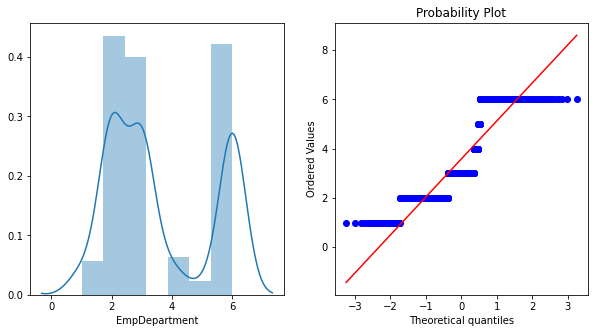

_________________________________________________________________________________________________________

                             E̲m̲p̲E̲n̲v̲i̲r̲o̲n̲m̲e̲n̲t̲S̲a̲t̲i̲s̲f̲a̲c̲t̲i̲o̲n:


skewness of the  EmpEnvironmentSatisfaction  is :  -0.30728009854747024
kurtosis of the  EmpEnvironmentSatisfaction  is :  -1.2055559189315166


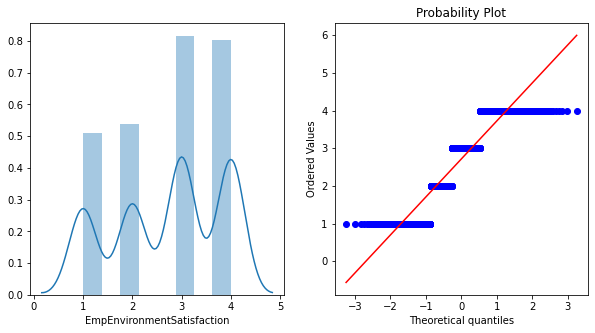

_________________________________________________________________________________________________________

                             E̲m̲p̲L̲a̲s̲t̲S̲a̲l̲a̲r̲y̲H̲i̲k̲e̲P̲e̲r̲c̲e̲n̲t:


skewness of the  EmpLastSalaryHikePercent  is :  0.8076424650015763
kurtosis of the  EmpLastSalaryHikePercent  is :  -0.3034891485530884


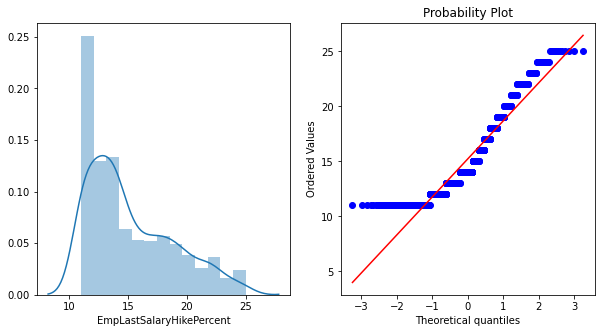

_________________________________________________________________________________________________________

                             E̲m̲p̲W̲o̲r̲k̲L̲i̲f̲e̲B̲a̲l̲a̲n̲c̲e:


skewness of the  EmpWorkLifeBalance  is :  -0.5385567854332284
kurtosis of the  EmpWorkLifeBalance  is :  0.38996068107395176


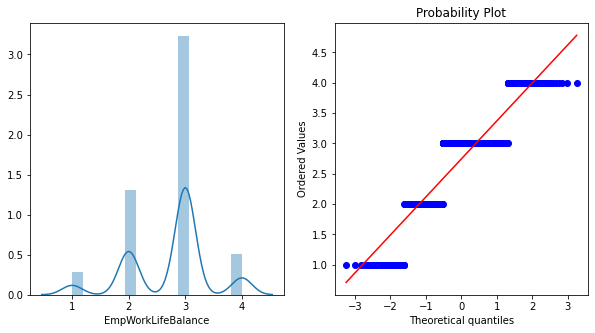

_________________________________________________________________________________________________________

                             E̲x̲p̲e̲r̲i̲e̲n̲c̲e̲Y̲e̲a̲r̲s̲A̲t̲T̲h̲i̲s̲C̲o̲m̲p̲a̲n̲y:


skewness of the  ExperienceYearsAtThisCompany  is :  1.7868178842417548
kurtosis of the  ExperienceYearsAtThisCompany  is :  4.036075117916915


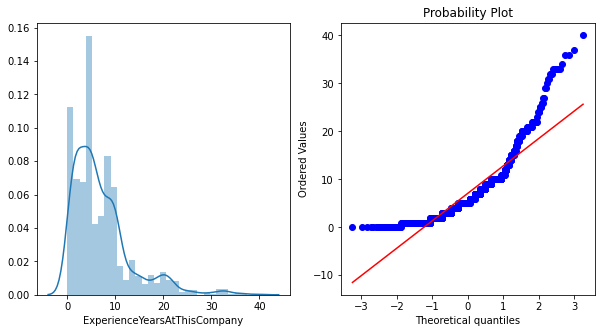

_________________________________________________________________________________________________________

                             E̲x̲p̲e̲r̲i̲e̲n̲c̲e̲Y̲e̲a̲r̲s̲I̲n̲C̲u̲r̲r̲e̲n̲t̲R̲o̲l̲e:


skewness of the  ExperienceYearsInCurrentRole  is :  0.8870480862786159
kurtosis of the  ExperienceYearsInCurrentRole  is :  0.431209859131672


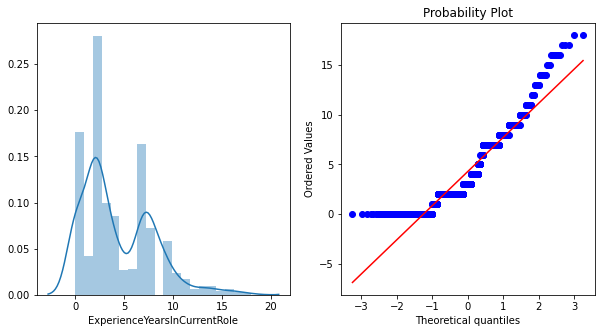

_________________________________________________________________________________________________________

                             Y̲e̲a̲r̲s̲S̲i̲n̲c̲e̲L̲a̲s̲t̲P̲r̲o̲m̲o̲t̲i̲o̲n:


skewness of the  YearsSinceLastPromotion  is :  1.9724620367914252
kurtosis of the  YearsSinceLastPromotion  is :  3.5193552691799805


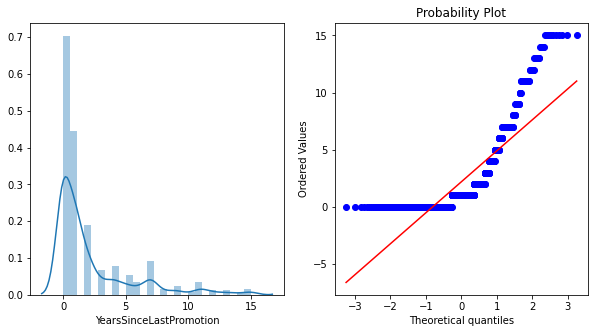

_________________________________________________________________________________________________________

                             Y̲e̲a̲r̲s̲W̲i̲t̲h̲C̲u̲r̲r̲M̲a̲n̲a̲g̲e̲r:


skewness of the  YearsWithCurrManager  is :  0.81214149476762
kurtosis of the  YearsWithCurrManager  is :  0.14258902091102943


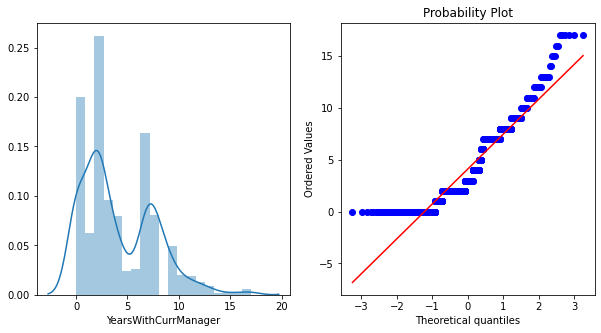

_________________________________________________________________________________________________________

                             P̲e̲r̲f̲o̲r̲m̲a̲n̲c̲e̲R̲a̲t̲i̲n̲g:


skewness of the  PerformanceRating  is :  -0.07048817723822184
kurtosis of the  PerformanceRating  is :  0.6666738318217393


E:\anaconda_promt\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


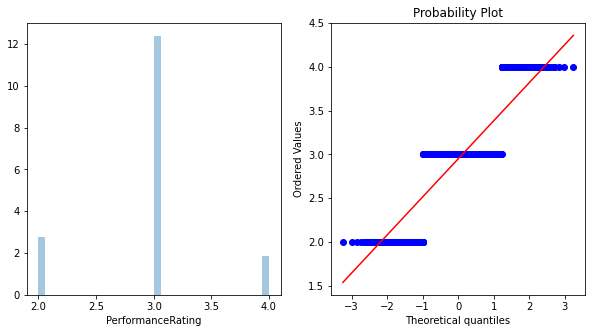

_________________________________________________________________________________________________________


In [55]:
for i in data.columns:
    print("\n                            ","\033[1m" + "\u0332".join(i)+ ":" + "\033[0m")
    plotfigure(data,i)
    line()

By seeing the above QQ_plot and distplot we can classify both continues and discreate feature. We need to normalise the cotinues features if it is not under normal_distribution

 here the continues features are : 
>EmpLastSalaryHikePercent, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager


### 2. Normalizing the Features

From the above figure after analysing we can say that only 2 feature are not satisfing normal_distribution so we need to handle those features:


-> ExperienceYearsAtThisCompany, YearsSinceLastPromotion

***-> Considering ExperienceYearsAtThisCompany for noramalization***

we need to transform feature using some feature transformation techniques first we can consider the square root method

In [56]:
ExperienceYearsAtThisCompany1 = (data.ExperienceYearsAtThisCompany) ** 1/2
print("skew of ExperienceYearsAtThisCompany     : ",stats.skew(ExperienceYearsAtThisCompany1))
print("kertosis of ExperienceYearsAtThisCompany : ",stats.kurtosis(ExperienceYearsAtThisCompany1))

skew of ExperienceYearsAtThisCompany     :  1.7868178842417548
kertosis of ExperienceYearsAtThisCompany :  4.036075117916915


while considering square root method the kertosis and skew are not in the range ie.,the doesn't belongs to normal distribution . so, we need to try another transformation technolgy

>Now we are considering Log() transformation:

In [57]:
ExperienceYearsAtThisCompany2 = np.log1p(data.ExperienceYearsAtThisCompany)
print("skew of ExperienceYearsAtThisCompany      : ",stats.skew(ExperienceYearsAtThisCompany2))
print("kertosis  of ExperienceYearsAtThisCompany : ",stats.kurtosis(ExperienceYearsAtThisCompany2))

skew of ExperienceYearsAtThisCompany      :  -0.19810385804168135
kertosis  of ExperienceYearsAtThisCompany :  -0.297246664263918


from the above skew and kertosis values its clear that both values lies in the range hence it belongs to Normal distribution. So we can continue with this transformation technique

> -> converting the ExperienceYearsAtThisCompany feature with new value :

In [58]:
data["ExperienceYearsAtThisCompany"] = ExperienceYearsAtThisCompany2

***-> Considering YearsSinceLastPromotion for noramalization***

So, we continue with the same transformation technique used above beacuse its working perfectly for the above feature

In [59]:
YearsSinceLastPromotion = np.log1p(data.YearsSinceLastPromotion)
print("skew of ExperienceYearsAtThisCompany      : ",stats.skew(YearsSinceLastPromotion))
print("kertosis  of ExperienceYearsAtThisCompany : ",stats.kurtosis(YearsSinceLastPromotion))

skew of ExperienceYearsAtThisCompany      :  0.7150525376833343
kertosis  of ExperienceYearsAtThisCompany :  -0.5981884317901489


from the above skew and kertosis values its clear that both values lies in the range hence it belongs to Normal distribution.

> -> converting the YearsSinceLastPromotion feature with new value :

# 6. Handling Outliers

if there is any outliers present while considering distance based model it will creates problems. so, we need to remove those outliers. Outliers need to be removed from continues features.

### 1.Checking for Outliers

By using boxplot we can easily find out weather outliers present in the feature or not 

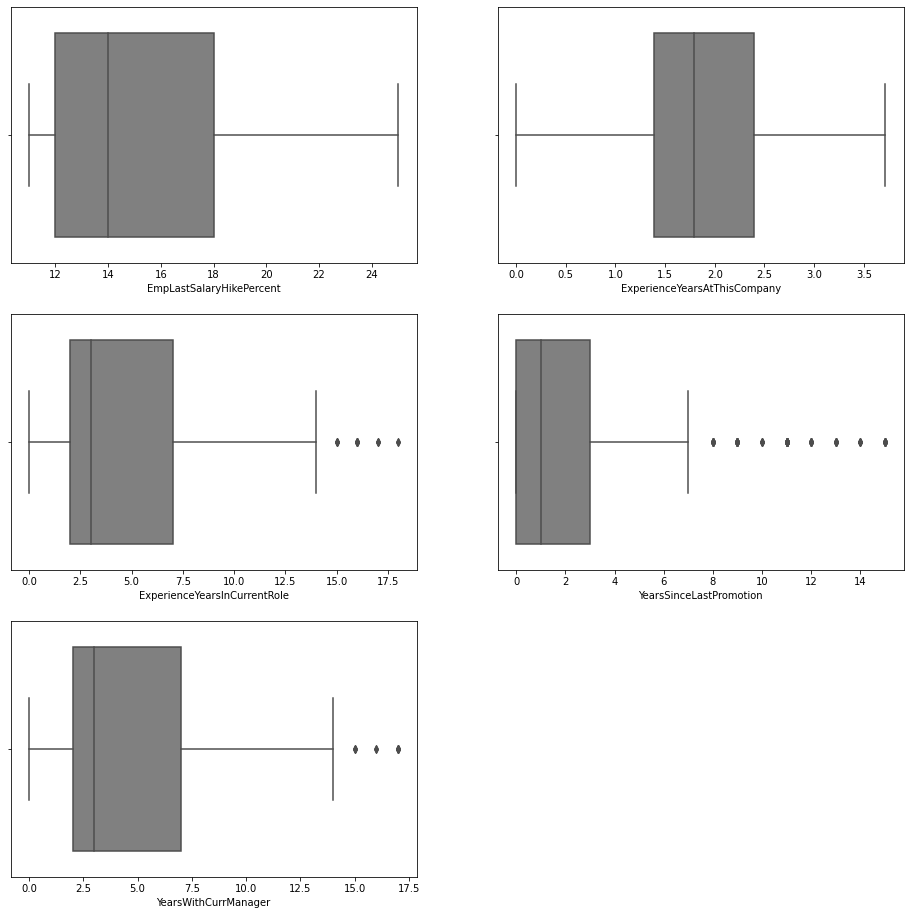

In [60]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.figsize"] = 16,16
plt.subplot(3,2,1)
sb.boxplot(data.EmpLastSalaryHikePercent,color="grey")
plt.subplot(3,2,2)
sb.boxplot(data.ExperienceYearsAtThisCompany,color="grey")
plt.subplot(3,2,3)
sb.boxplot(data.ExperienceYearsInCurrentRole,color="grey")
plt.subplot(3,2,4)
sb.boxplot(data.YearsSinceLastPromotion,color="grey")
plt.subplot(3,2,5)
sb.boxplot(data.YearsWithCurrManager,color="grey")
plt.show()

From the above BOXPLOT its clear that there are Outliers present in our feature. hence we need to  remove/handle those outliers. here  " EmpLastSalaryHikePercent " & " ExperienceYearsInCurrentRole " has no outliers other three features we need to handle Outliers


### 2.Removing Outliers from Feature

Here we are considering 3sigma method for finding outliers

***-> Considering the ExperienceYearsAtThisCompany feature***

we need to find mean value and standard deviation(sigma) to finding lowering boundary and heigher boundary  

In [61]:
Exp_Years_mean = data.ExperienceYearsInCurrentRole.mean()
Exp_Years_std  = data.ExperienceYearsInCurrentRole.std()
print("mean value of ExperienceYearsAtThisCompany is : ",Exp_Years_mean)
print("std  value of ExperienceYearsAtThisCompany is : ",Exp_Years_std)

mean value of ExperienceYearsAtThisCompany is :  4.291666666666667
std  value of ExperienceYearsAtThisCompany is :  3.6137441125488445


In [62]:
#now we need to find the lower boundary and upper boundary
lower_boundry   = Exp_Years_mean - (3 * Exp_Years_std)
heigher_boundry = Exp_Years_mean + (3 * Exp_Years_std)
print("Lower Boundary of ExperienceYearsAtThisCompany is : ",lower_boundry)
print("heigher Boundary of ExperienceYearsAtThisCompany is : ",heigher_boundry)

Lower Boundary of ExperienceYearsAtThisCompany is :  -6.5495656709798675
heigher Boundary of ExperienceYearsAtThisCompany is :  15.132899004313202


We know that Experience will not become negative value and our feature doesn't have the negative values so we can avoid the lower boundary now we can consider upper boundry and change all the values grater than heigher boundry with the boundry value 

In [63]:
data1 = data.loc[:,["ExperienceYearsInCurrentRole"]]
data1.head()
data1.loc[data1.ExperienceYearsInCurrentRole > heigher_boundry,"ExperienceYearsInCurrentRole"] = heigher_boundry

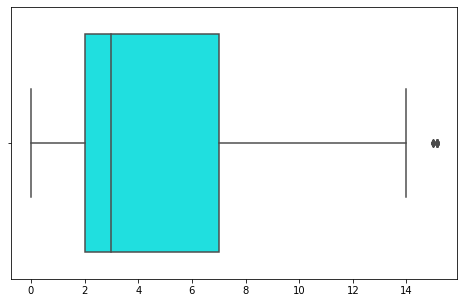

In [64]:
plt.rcParams["figure.figsize"] = 8,5
sb.boxplot(data1,color="cyan")

here by seeing the boxplot we can say that by using mean standard deviation method we cannot 

In [65]:
IQR = data.ExperienceYearsInCurrentRole.quantile(0.75) - data.ExperienceYearsInCurrentRole.quantile(0.25)
over_bridge = data.ExperienceYearsInCurrentRole.quantile(0.75)+(1.5*IQR)
under_bridge = data.ExperienceYearsInCurrentRole.quantile(0.75)-(1.5*IQR)
print("Inter Quantile Range                  : ",IQR)
print("Over bridge value for the feature is  : ",over_bridge)
print("Under bridge value for the feature is : ",under_bridge)

Inter Quantile Range                  :  5.0
Over bridge value for the feature is  :  14.5
Under bridge value for the feature is :  -0.5


In [66]:
# we are considering the over bridge only under bridge is not considered because outliers are present in upper side only
data.loc[data.ExperienceYearsInCurrentRole >over_bridge,"ExperienceYearsInCurrentRole"] = over_bridge

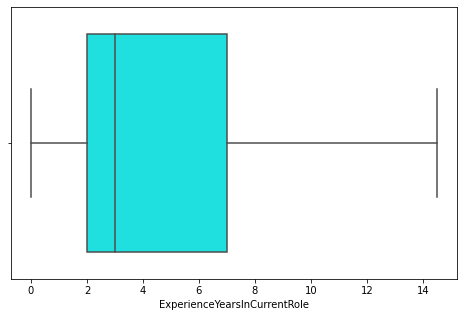

In [67]:
plt.rcParams["figure.figsize"] = 8,5
sb.boxplot(data.ExperienceYearsInCurrentRole,color="cyan")

from the above boxplot it is clear that the outliers are removed

***-> Considering the YearsSinceLastPromotion feature***

here we continue with IQR method

In [68]:
IQR = data.YearsSinceLastPromotion.quantile(0.75) - data.YearsSinceLastPromotion.quantile(0.25)
over_bridge = data.YearsSinceLastPromotion.quantile(0.75)+(1.5*IQR)
under_bridge = data.YearsSinceLastPromotion.quantile(0.75)-(1.5*IQR)
print("Inter Quantile Range                  : ",IQR)
print("Over bridge value for the feature is  : ",over_bridge)
print("Under bridge value for the feature is : ",under_bridge)

Inter Quantile Range                  :  3.0
Over bridge value for the feature is  :  7.5
Under bridge value for the feature is :  -1.5


In [69]:
# we are considering the over bridge only under bridge is not considered because outliers are present in upper side only
data.loc[data.YearsSinceLastPromotion >over_bridge,"YearsSinceLastPromotion"] = over_bridge

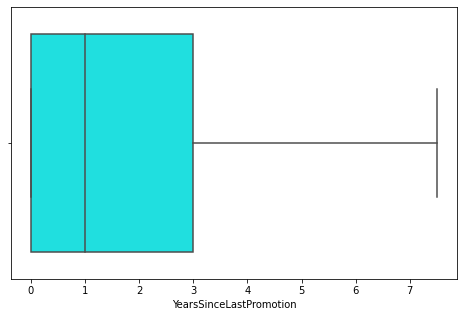

In [70]:
plt.rcParams["figure.figsize"] = 8,5
sb.boxplot(data.YearsSinceLastPromotion,color="cyan")

from the above boxplot it is clear that the outliers are removed

***-> Considering the YearsWithCurrManager feature***

 here we continue with IQR method

In [71]:
IQR = data.YearsWithCurrManager.quantile(0.75) - data.YearsWithCurrManager.quantile(0.25)
over_bridge = data.YearsWithCurrManager.quantile(0.75)+(1.5*IQR)
under_bridge = data.YearsWithCurrManager.quantile(0.75)-(1.5*IQR)
print("Inter Quantile Range                  : ",IQR)
print("Over bridge value for the feature is  : ",over_bridge)
print("Under bridge value for the feature is : ",under_bridge)

Inter Quantile Range                  :  5.0
Over bridge value for the feature is  :  14.5
Under bridge value for the feature is :  -0.5


In [72]:
# we are considering the over bridge only under bridge is not considered because outliers are present in upper side only
data.loc[data.YearsWithCurrManager >over_bridge,"YearsWithCurrManager"] = over_bridge

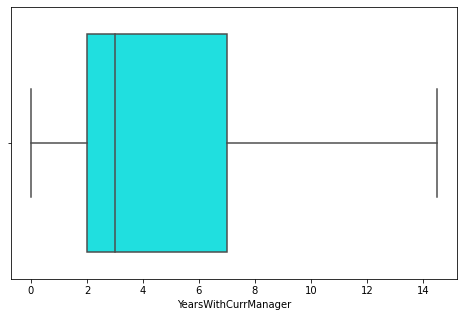

In [73]:
plt.rcParams["figure.figsize"] = 8,5
sb.boxplot(data.YearsWithCurrManager,color="cyan")

from the above boxplot it is clear that the outliers are removed

# 7. Defining Indipendent and Dependent Features

Here varaible X denotes the Independent Features and Y denotes the Target/Dependent variable

In [74]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

***Here all the values in the features lies under 0 to 25 hence we doesnot need scailing we can directly go to train test split***

# 8. Splitting the Data

here the splitting of data using train test split from sklearn

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= .3,random_state = 41)

# 9. Balancing the Data

we can use count plot to find weather the target variable is balaced or not

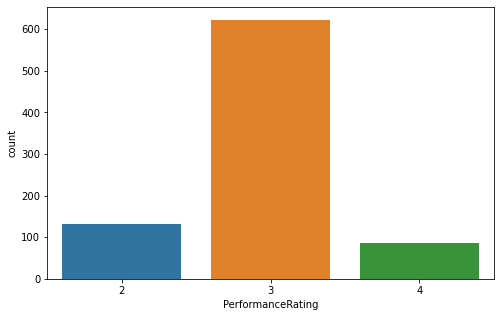

Counter({3: 622, 2: 131, 4: 87})


In [76]:
sb.countplot(y_train)
plt.show()
print(Counter(y_train))

the above count plot shows that the data is not balanced hence we need to balance the data before modelling


Here we are using upsampling technique for balancing the data

## SMOTE

SMOTE is an upsampling technique from inbalanced learn mainly used for balancing the data here the technique creates new data points by taking the cetroid of k number of points

In [77]:
smote = SMOTE(k_neighbors=3)
X_train_sm,y_train_sm = smote.fit_sample(X_train,y_train)

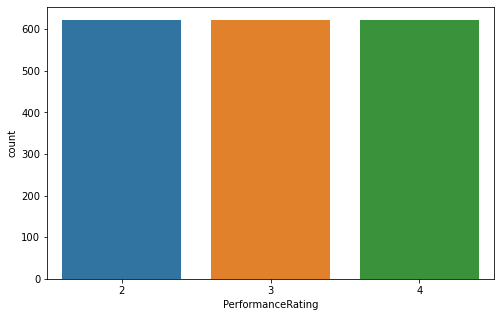

Counter({3: 622, 4: 622, 2: 622})


In [78]:
sb.countplot(y_train_sm)
plt.show()
print(Counter(y_train_sm))

Above graph shows that the data is balanced after doing oversampling. now we can do modelling 

# 10. Modelling

### 1.Modelling using Logistic_Regression 

In [79]:
model = LogisticRegression(random_state = 10)
model.fit(X_train_sm,y_train_sm)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

E:\anaconda_promt\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7527777777777778

Accuracy of logistic reression is low.ckecking crosstab for model

In [80]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,41,15,7
3,23,193,36
4,2,6,37


here while considering category 2 : accuracy is only around 50% so we cannot go with this model hence we need to indroduce new model

### 2. Modelling using KNN

In [81]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_sm,y_train_sm)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7583333333333333

here the accuracy is low so we can find the best k value using error curve

***plotting error curve for finding k value in KNN***

In [82]:
error=[]
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_sm,y_train_sm)
    y_predict = model.predict(X_test)
    error.append(np.sum(y_predict != y_test))

plotting error curve to find the least global minima point and take that value as our k value 

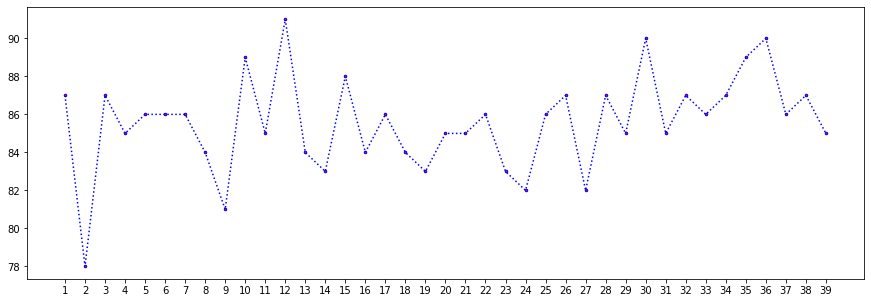

In [83]:
k = range(1,40)
plt.rcParams["figure.figsize"] = 15,5
plt.plot(k,error,c = "b",marker = ".",markerfacecolor = "red",markersize = 5,linestyle = ":")
plt.xticks(k)
plt.show()

Here we get that global minima for k value is 2, hence we remodel the knn using k value as 2 

In [84]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_sm,y_train_sm)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7833333333333333

In [85]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,43,13,7
3,26,210,16
4,6,10,29


while considering accuracy and crosstab KNN is good but we need more accuracy. so changing the model with another one

### 3. Modelling using Decision Tree

In [86]:
model = DecisionTreeClassifier(random_state = 24)
model.fit(X_train_sm,y_train_sm)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8916666666666667

In [87]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,54,8,1
3,5,232,15
4,1,9,35


while comparing the logistic and knn model decision tree works better and gives 89% accuracy so using one single tree we gets good percentage if we use ensemble technique we surely get 90% + accuracy so considering one more model ie., Random Forest

### 2. Modelling using Random Forest

In [88]:
model = RandomForestClassifier(random_state = 41)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9472222222222222

***Cross_Tab***

In [89]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,57,6,0
3,1,249,2
4,1,9,35


we are getting a high accuracy while using random forest. so we need to check weather the model is overfitted or not. for that we use cross_validation_score as well as we need check the classification report


***classification_Report***

In [90]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.97      0.90      0.93        63
           3       0.94      0.99      0.97       252
           4       0.95      0.78      0.85        45

    accuracy                           0.95       360
   macro avg       0.95      0.89      0.92       360
weighted avg       0.95      0.95      0.95       360



While consider classification report recall and presission score are good so now we can check the CV_Score 

***Cross_Validation_Score***

In [91]:
cv_score = cross_val_score(RandomForestClassifier(),X,y,cv=8)
cv_score


array([0.90666667, 0.94      , 0.94      , 0.96      , 0.97333333,
       0.91333333, 0.89333333, 0.87333333])

In [92]:
print("Maximum cv_score = ",max(cv_score))
print("Minimum cv_score = ",min(cv_score))
print("Average cv_score = ",cv_score.mean())

Maximum cv_score =  0.9733333333333334
Minimum cv_score =  0.8733333333333333
Average cv_score =  0.925


 From the above cv_score its clear that our model is not overfitted so we can continue with this model and now we are hypertuning the model for better             perfomance

***Hyper Parameter Tuning Using GRID Search CV***

creating parameter Grid :

In [93]:
parameters = { 
                "random_state"       : [10,13,23,24,40],
                "n_estimators"       : [50,80,100,120,150],
                "min_samples_split"  : [2,4,8,10],
                "min_samples_leaf"   : [1,3,5,7],
                "max_depth"          : [10,20,30]
            }

In [94]:
if best_score == None:
    #grid_score = GridSearchCV(RandomForestClassifier(),param_grid=parameters,verbose=2,scoring="accuracy")
    #grid_score.fit(X_train,y_train)
    pass
else:
    pass

NameError: name 'best_score' is not defined

In [95]:
best_score = grid_score.best_score_
best_score

NameError: name 'grid_score' is not defined

In [ ]:
grid_score.best_params_

### Remodelling 

remodelling Random Forest using Best Parameters from grid search cv (hyper parameter tuning)

In [ ]:
model = RandomForestClassifier(max_depth= 20,min_samples_leaf= 1,min_samples_split=10,n_estimators=50,random_state = 23)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

In [96]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,57,6,0
3,1,249,2
4,1,9,35


***Classification Report :***

In [97]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.97      0.90      0.93        63
           3       0.94      0.99      0.97       252
           4       0.95      0.78      0.85        45

    accuracy                           0.95       360
   macro avg       0.95      0.89      0.92       360
weighted avg       0.95      0.95      0.95       360



while considering classification score it provide a good precission and recall score and the accuracy for the model is above 95%.

# 11.Saving The Model (As Pickle File)

For exporting the model in future we need a pickle file so for that we are saving the current model in a pickle file in the format of Binary

In [98]:
pkl.dump(model,open("model.pkl","wb"))

sucessfully dumped the file as a pickle file and it was saved in the same directory

# 12. CONCLUSSION

Hence finished the project with an accuracy score of approximate 96% I think its a better accuracy while considering the client requiremnts.

***-> This is the department wise perfomance rating of the company.so by using this data the company can easily identify the week department and give them some guidence:***

1. Development             :  3.085873
2. Data Science            :  3.050000
3. Human Resources         :  2.925926
4. Research & Development  :  2.921283
5. Sales                   :  2.860590
6. Finance                 :  2.775510

***-> Hence we find out the Top 3 Important Factors effecting employee performance are :***

Here we have used the corrilation technique we find out the corrilation of the independent features with the target feature(depend) and taken the three features which have high corrilation with the target feature.

1. EmpEnvironmentSatisfaction
2. EmpLastSalaryHikePercent
3. EmpDepartment

### Suggesions :

***-> The company need to provide a better environment for the employee. they want to advance their technology to give a better environment and a suitable condition for the working of employees.Provide insurance,accomadation,food,basic needs etc..***

***-> The company need to take care of their employee salory. needs to give salory hike according to their experience, area of work etc.. without any failure***

***-> company need to ensure the department wise perfomance and ensure that there is no lacking in the requirents of the employee in department wise. need to provide some carriculam and courses to encorage the employees as well as it will increase the perfomance***

In [102]:
data.columns

Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')